## Name: Foruchu Nelo Wemdrise
Specialty: Software Engineering



In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from word2number import w2n



In [7]:

df = pd.read_csv('hiring.csv')
df.head()


,Expirience/years,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [9]:

print("Original Data:\n", df)
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace=True)
def convert_exp(x):
    try:
        return w2n.word_to_num(x)
    except:
        return x

df['Expirience/years'] = df['Expirience/years'].apply(convert_exp)

df['Expirience/years'].fillna(0, inplace=True)

df['Expirience/years'] = df['Expirience/years'].astype(int)

print("\nCleaned Data:\n", df)





Original Data:
   Expirience/years  test_score(out of 10)  interview_score(out of 10)  \
0              NaN                    8.0                           9   
1              NaN                    8.0                           6   
2             five                    6.0                           7   
3              two                   10.0                          10   
4            seven                    9.0                           6   
5            three                    7.0                          10   
6              ten                    NaN                           7   
7           eleven                    7.0                           8   

   salary($)  
0      50000  
1      45000  
2      60000  
3      65000  
4      70000  
5      62000  
6      72000  
7      80000  

Cleaned Data:
    Expirience/years  test_score(out of 10)  interview_score(out of 10)  \
0                 0               8.000000                           9   
1                 0        

/tmp/ipython-input-9-1579957965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace=True)
/tmp/ipython-input-9-1579957965.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

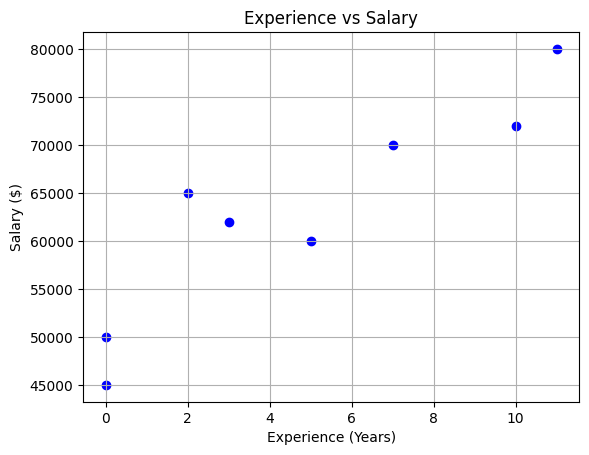

In [10]:
plt.scatter(df['Expirience/years'], df['salary($)'], color='blue')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.title('Experience vs Salary')
plt.grid(True)
plt.show()

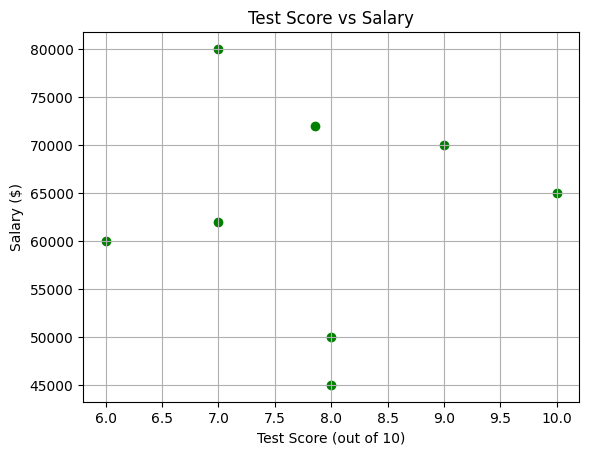

In [11]:
plt.scatter(df['test_score(out of 10)'], df['salary($)'], color='green')
plt.xlabel('Test Score (out of 10)')
plt.ylabel('Salary ($)')
plt.title('Test Score vs Salary')
plt.grid(True)
plt.show()


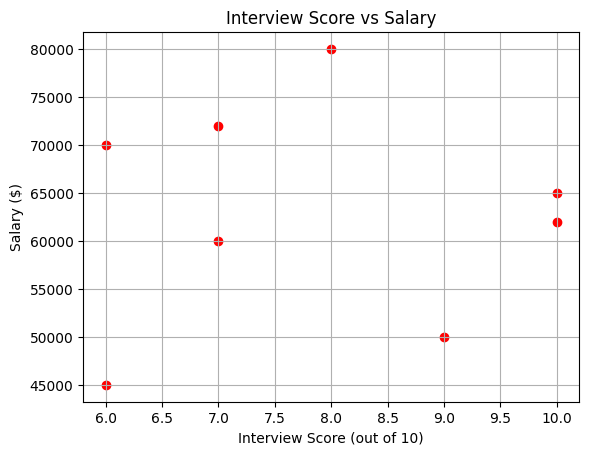

In [12]:
plt.scatter(df['interview_score(out of 10)'], df['salary($)'], color='red')
plt.xlabel('Interview Score (out of 10)')
plt.ylabel('Salary ($)')
plt.title('Interview Score vs Salary')
plt.grid(True)
plt.show()


In [13]:

X = df[['Expirience/years', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']


model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [14]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [2827.63404314 1912.93803053 2196.9753141 ]
Intercept: 17237.330313727172


In [16]:

john_df = pd.DataFrame([{
    'Expirience/years': 8,
    'test_score(out of 10)': 10,
    'interview_score(out of 10)': 8
}])

# Predict salary without warning
predicted_salary = model.predict(john_df)

print(f"Predicted salary for John: ${predicted_salary[0]:,.2f}")


Predicted salary for John: $76,563.59


In [17]:
mary_df = pd.DataFrame([{
    'Expirience/years': 12,
    'test_score(out of 10)': 10,
    'interview_score(out of 10)': 10
}])

# Predict salary without warning
predicted_salary = model.predict(mary_df)

print(f"Predicted salary for Mary: ${predicted_salary[0]:,.2f}")


Predicted salary for Mary: $92,268.07
